In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

breast_cancer = datasets.load_breast_cancer()
## let's get the data set features
features = breast_cancer.data
## get the class labels
labels = breast_cancer.target

The dataset in the 2-dimensional space, through PCA:

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


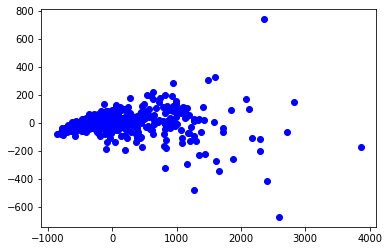

In [2]:
num_components = 2
breast_cancer_pca = PCA(n_components = num_components)

breast_cancer_pca.fit(features)
breast_cancer_pca_2D = breast_cancer_pca.transform(features)
print(breast_cancer_pca_2D)

plt.plot(breast_cancer_pca_2D[:, 0], breast_cancer_pca_2D[:, 1], 'bo' )



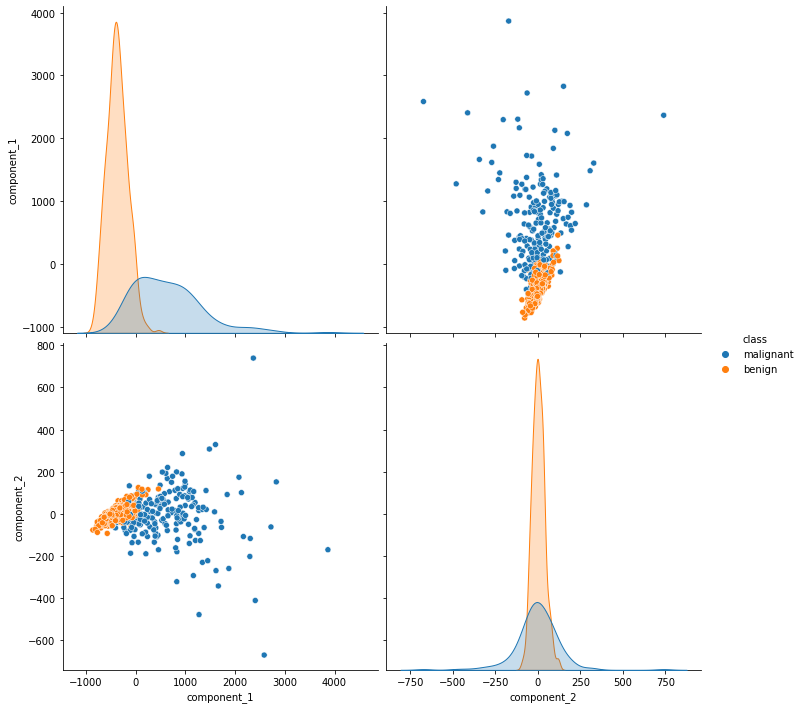

In [3]:
num_components = 2
data_pca = PCA(n_components = num_components)

data_pca.fit(features)
data_pca_2D = data_pca.transform(features)
#print('data_pca_2D.shape:', data_pca_2D.shape)

df_data_pca_2D = pd.DataFrame(data_pca_2D, columns = ['component_1', 'component_2'])

df_data_pca_2D.insert(num_components, 'class', breast_cancer.target_names[labels])  #loc, column, value

sns.pairplot( data = df_data_pca_2D, hue='class', height=5)

In [4]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.3, random_state=1928)

# SVC with kernel = 'linear'/'rbf' and C=10/100/1000

In [5]:
clf = make_pipeline(StandardScaler(), SVC(C = 10, kernel = 'linear'))
clf = clf.fit(features_train, labels_train)
clf_train_predict = clf.predict( features_train )
clf_test_predict = clf.predict( features_test )

train_accuracy = accuracy_score(labels_train, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_test, clf_test_predict )
print('test_accuracy:', test_accuracy)

train_accuracy: 0.992462311557789
test_accuracy: 0.9532163742690059


In [6]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', C = 10))
clf = clf.fit(features_train, labels_train)
clf_train_predict = clf.predict( features_train )
clf_test_predict = clf.predict( features_test )

train_accuracy = accuracy_score(labels_train, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_test, clf_test_predict )
print('test_accuracy:', test_accuracy)

train_accuracy: 0.9949748743718593
test_accuracy: 0.9766081871345029


In [7]:
clf = make_pipeline(StandardScaler(), SVC(C = 100, kernel = 'linear' ))
clf = clf.fit(features_train, labels_train)
clf_train_predict = clf.predict( features_train )
clf_test_predict = clf.predict( features_test )

train_accuracy = accuracy_score(labels_train, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_test, clf_test_predict )
print('test_accuracy:', test_accuracy)

train_accuracy: 0.9974874371859297
test_accuracy: 0.9532163742690059


In [8]:
clf = make_pipeline(StandardScaler(), SVC(C = 100, kernel = 'rbf' ))
clf = clf.fit(features_train, labels_train)
clf_train_predict = clf.predict( features_train )
clf_test_predict = clf.predict( features_test )

train_accuracy = accuracy_score(labels_train, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_test, clf_test_predict )
print('test_accuracy:', test_accuracy)

train_accuracy: 1.0
test_accuracy: 0.9532163742690059


In [9]:
clf = make_pipeline(StandardScaler(), SVC(C = 1000, kernel = 'linear' ))
clf = clf.fit(features_train, labels_train)
clf_train_predict = clf.predict( features_train )
clf_test_predict = clf.predict( features_test )

train_accuracy = accuracy_score(labels_train, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_test, clf_test_predict )
print('test_accuracy:', test_accuracy)

train_accuracy: 1.0
test_accuracy: 0.9473684210526315


In [10]:
clf = make_pipeline(StandardScaler(), SVC(C = 1000, kernel = 'rbf' ))
clf = clf.fit(features_train, labels_train)
clf_train_predict = clf.predict( features_train )
clf_test_predict = clf.predict( features_test )

train_accuracy = accuracy_score(labels_train, clf_train_predict)
print('train_accuracy:', train_accuracy)
test_accuracy = accuracy_score( labels_test, clf_test_predict )
print('test_accuracy:', test_accuracy)

train_accuracy: 1.0
test_accuracy: 0.9532163742690059


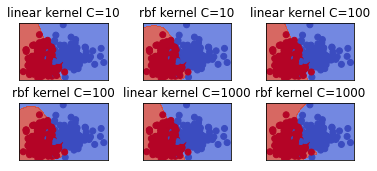

In [11]:
## Refrence: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html



# import some data to play with
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = breast_cancer.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
lin_svc_10 = svm.SVC(kernel='linear', C = 10).fit(X, y)
rbf_svc_10 = svm.SVC(kernel='rbf', C=10).fit(X, y)
lin_svc_100 = svm.SVC(kernel='linear', C = 100).fit(X, y)
rbf_svc_100 = svm.SVC(kernel='rbf', C=100).fit(X, y)
lin_svc_1000 = svm.SVC(kernel='linear', C = 1000).fit(X, y)
rbf_svc_1000 = svm.SVC(kernel='rbf', C=1000).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['linear kernel C=10',
          'rbf kernel C=10',
          'linear kernel C=100',
          'rbf kernel C=100',
          'linear kernel C=1000',
          'rbf kernel C=1000']


for i, clf in enumerate((lin_svc_10, rbf_svc_10, lin_svc_100, rbf_svc_100, lin_svc_1000, rbf_svc_1000)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(3, 3, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

#Discussion:
In our models, we noticed that when C is big the 'train' accuracy is big. The accuracy can reach 100%. However, when we give big values to C, the accuracy of 'test' gets smaller and this is due to over-fitting. We can also notice that when we use 'rbf', the 'test' accuracy is bigger than the one for 'linear'. I am not sure of that but I think that we can clearly see from the last figure, that 'rbf' is more flexible while 'linear' is not. This was my assumption.
Concerning the PCA plot of the dataset, we can't see important things other than  benign are more grouped than malignant.